In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import plotly.graph_objects as go

In [5]:
from mplsoccer import Sbopen, Pitch

In [6]:
from matplotlib.patches import Arc, Rectangle, ConnectionPatch

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
parser = Sbopen()

In [9]:
df_wc_matches = parser.match(competition_id=43, season_id=106)

In [10]:
all_shots = pd.DataFrame()

In [11]:
lst_teams = ["Argentina", "France"]

In [12]:
for idx, match in df_wc_matches.iterrows():
    
    df_match = parser.event(match.match_id)[0]
    #print(df_match.team_name)
    #if df_match.team_name in lst_teams:
    df_match_shots = df_match[(df_match['type_name']=="Shot")]
    all_shots = pd.concat([all_shots, df_match_shots])

In [13]:
x = all_shots['x']
y = all_shots['y']

target_x = 120
target_y = 40

distances = np.sqrt((x - target_x)**2 + (y - target_y)**2)

all_shots['distance'] = distances

In [14]:
top_team_shots = pd.DataFrame()

In [15]:
for team in lst_teams:
    temp_df = all_shots[all_shots['team_name']==team]
    top_team_shots = pd.concat([top_team_shots, temp_df])

### Figure-3

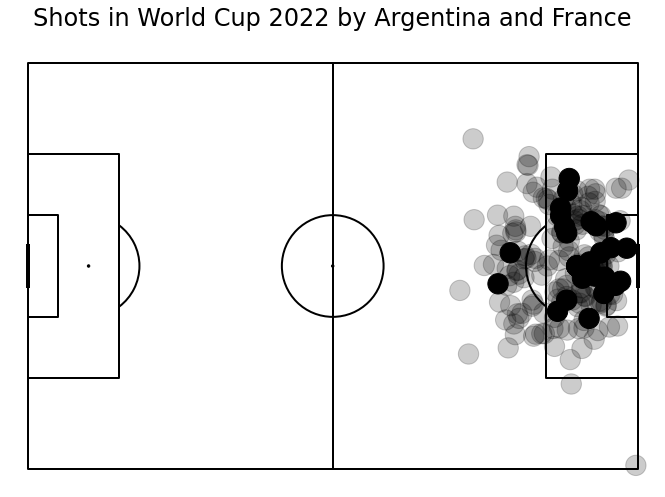

In [16]:
pitch = Pitch(line_color='black')
fig, ax = pitch.draw(figsize = (10,8))

pitchLengthX = 120
pitchWidthY = 80

for i, shot in top_team_shots.iterrows():
    x = shot['x']
    y = shot['y']
    
    circle_size = 2
    
    if shot['outcome_name'] == 'Goal':
        shot_circle = plt.Circle((x, y), circle_size, color='black')
    else:
        shot_circle = plt.Circle((x, y), circle_size, color='black')
        shot_circle.set_alpha(0.2)
    
    ax.add_patch(shot_circle)
# shot_circle = plt.Circle((120, 40), circle_size, color='red')
# ax.add_patch(shot_circle)
fig.suptitle("Shots in World Cup 2022 by Argentina and France", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

In [17]:
top_team_shots.head(2)

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,pass_cross,outcome_id,outcome_name,under_pressure,shot_statsbomb_xg,technique_id,technique_name,shot_first_time,goalkeeper_position_id,goalkeeper_position_name,pass_assisted_shot_id,pass_shot_assist,end_z,shot_key_pass_id,off_camera,pass_deflected,counterpress,aerial_won,pass_switch,out,foul_won_defensive,shot_one_on_one,pass_cut_back,block_offensive,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_advantage,foul_won_advantage,pass_miscommunication,ball_recovery_recovery_failure,dribble_nutmeg,shot_open_goal,substitution_replacement_id,substitution_replacement_name,injury_stoppage_in_chain,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,dribble_overrun,foul_committed_offensive,ball_recovery_offensive,foul_committed_penalty,foul_won_penalty,dribble_no_touch,shot_follows_dribble,block_save_block,half_start_late_video_start,shot_redirect,distance
838,9fd07a9a-2de2-4ba5-b400-6a2264835ba2,839,1,00:16:29.766000,16,29,25,0.938361,3869151,16,Shot,779,Argentina,3,From Free Kick,779,Argentina,NaN,7006.0,Alejandro Darío Gómez,21.0,Left Wing,NaN,NaN,NaN,NaN,NaN,NaN,120.0,47.5,40.0,Right Foot,87.0,Open Play,98.2,20.1,NaN,98.0,Off T,NaN,0.011147,93.0,Normal,NaN,NaN,NaN,NaN,NaN,7.1,737eb3e8-23bf-4308-bc56-e9f9af6acd45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.516944
1645,53d825ac-a98d-41ca-b81f-1015dee17376,1646,1,00:34:35.083000,34,35,52,0.883672,3869151,16,Shot,779,Argentina,3,From Free Kick,779,Argentina,NaN,5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,120.0,37.1,38.0,Left Foot,87.0,Open Play,104.2,48.9,NaN,97.0,Goal,NaN,0.066638,93.0,Normal,NaN,NaN,NaN,NaN,NaN,0.3,7c8c4c58-fd12-4739-90d0-6c7708632504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.134222


### Figure-4

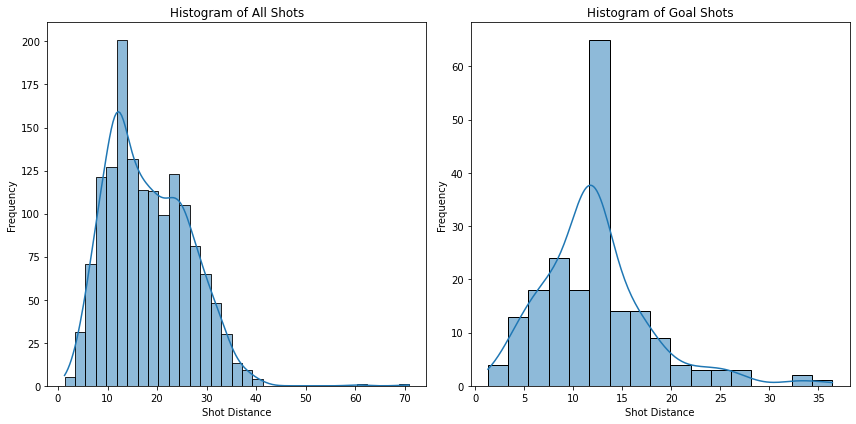

In [18]:
distance_data = all_shots['distance']
goal_distance_data = all_shots[all_shots['outcome_name'] == 'Goal']['distance']

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram
sns.histplot(distance_data, ax=axes[0], kde=True)
axes[0].set_xlabel('Shot Distance')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of All Shots')

# Plot the second histogram
sns.histplot(goal_distance_data, ax=axes[1], kde=True)
axes[1].set_xlabel('Shot Distance')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Goal Shots')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [19]:
def quality_func(shot_xg):
    if shot_xg > 0.7:
        return "High Quality Chance"
    elif shot_xg > 0.4:
        return "Good Chance"
    elif shot_xg > 0.2:
        return "Moderate Chance"
    else:
        return "Low Quality Chance"

In [20]:
all_shots['Quality_of_Shot'] = all_shots['shot_statsbomb_xg'].apply(quality_func)

In [21]:
all_shots['if_goal'] = all_shots['outcome_name'].apply(lambda outcome: 1 if outcome == "Goal" else 0)

In [22]:
grouped_counts = all_shots.groupby(['Quality_of_Shot', 'if_goal']).size()

grouped_counts = grouped_counts.reset_index(name='Count')

crosstab_table = pd.crosstab(grouped_counts['Quality_of_Shot'], grouped_counts['if_goal'], 
                             values=grouped_counts['Count'], aggfunc='sum')

In [23]:
row_order = ['Low Quality Chance', 'Moderate Chance', 'Good Chance', 'High Quality Chance']

# Rearrange the rows in the crosstab table
rearranged_table = crosstab_table.reindex(row_order)
rearranged_table = rearranged_table.rename_axis('Goal', axis='columns')

column_rename_dict = {
    1: 'Yes',
    0: 'No'
}

# Rename the columns using the dictionary
rearranged_table = rearranged_table.rename(columns=column_rename_dict)


In [24]:
rearranged_table['Probability_of_Goal'] = round((rearranged_table['Yes'])/(rearranged_table['Yes']+rearranged_table['No']),2)

In [25]:
rearranged_table

Goal,No,Yes,Probability_of_Goal
Quality_of_Shot,,,
Low Quality Chance,1167,81,0.06
Moderate Chance,91,32,0.26
Good Chance,20,31,0.61
High Quality Chance,21,51,0.71


<AxesSubplot:xlabel='distance', ylabel='shot_statsbomb_xg'>

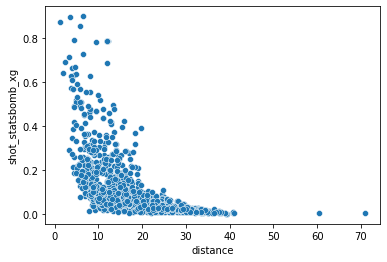

In [26]:
sns.scatterplot(y=all_shots['shot_statsbomb_xg'], x =all_shots['distance'])

In [27]:
def draw_half_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([60,0], width = 60, height = 80, fill = False)
    #Right Penalty Area
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)

    #Right 6-yard Box
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = Arc((60,40),width = 8.1, height = 8.1, angle=0,theta1=270,theta2=90,color="black")
    centreSpot = plt.Circle((60,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, RightPenalty, RightSixYard, centreCircle, centreSpot, rightPenSpot, rightArc]
    for i in element:
        ax.add_patch(i)

In [28]:
shot_data = top_team_shots

### Figure-5

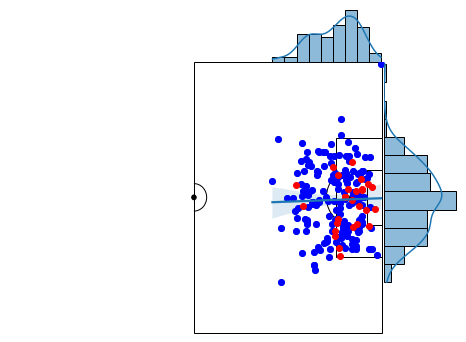

In [29]:

x_coord_goal = [x_point for i, x_point in enumerate(shot_data["x"]) if shot_data.iloc[i]['outcome_name'] == "Goal"]
y_coord_goal = [y_point for i, y_point in enumerate(shot_data["y"]) if shot_data.iloc[i]['outcome_name'] == "Goal"]

x_coord = [x_point for i, x_point in enumerate(shot_data["x"]) if shot_data.iloc[i]['outcome_name'] != "Goal"]
y_coord = [y_point for i, y_point in enumerate(shot_data["y"]) if shot_data.iloc[i]['outcome_name'] != "Goal"]

joint_shot_chart = sns.jointplot(x=x_coord, y=y_coord,
                                 kind='reg', space=0)

joint_shot_chart.fig.set_size_inches(7,5)
ax = joint_shot_chart.ax_joint
draw_half_pitch(ax)

ax.set_xlim(0.5,120.5)
ax.set_ylim(0.5,80.5)


ax.scatter(x_coord, y_coord, c = 'b', label = 'shots')
ax.scatter(x_coord_goal, y_coord_goal, c = 'r', label = 'goal')

ax.set_xlabel('')
ax.set_ylabel('')
joint_shot_chart.ax_marg_x.set_axis_off()
ax.set_axis_off()
plt.ylim(-.5, 80)

plt.axis('off')
plt.show()